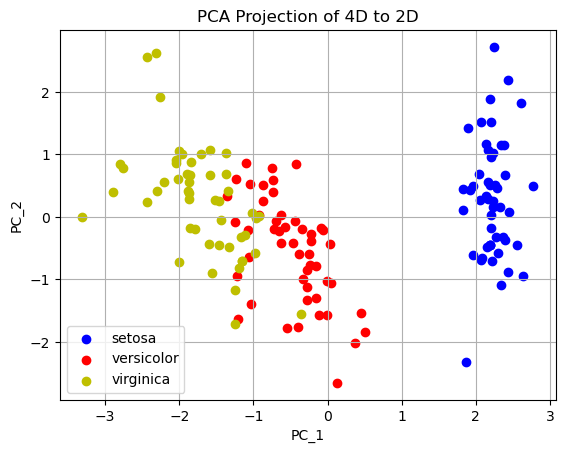

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
dataset = np.loadtxt("irisdata_original.txt", delimiter="\t", comments='%')

#Extract the matrix
X = dataset[:, 0:4]
y = dataset[:, 4]

# Step 1: Standardization
X_bar = np.mean(X, axis=0) #computes the mean of each column in X
std_dev = np.std(X, axis=0) #computes the standard deviation of each column in X
X_std = (X - X_bar) / std_dev #standardizes the matrix X

# Step 2: Build the covariance matrix, C
C = np.cov(X_std, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(C)

# Step 4: Sort the eigenvalues in a descending order
sort_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors=eigenvectors[:, sort_indices]
sorted_eigenvalues=eigenvalues[sort_indices]

# Step 5: Project the data along the 2 principle components
X_pca = np.dot(X_std, sorted_eigenvectors[:, :2])

# Step 6: Visualization
colors = ['b', 'r', 'y']
labels = ['setosa', 'versicolor', 'virginica']

for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=label)

plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('PCA Projection of 4D to 2D')
plt.legend()
plt.grid(True)
plt.show()